In [5]:
import folium
from folium import plugins
import pandas as pd
from scipy import stats
import numpy as np

In [3]:
divvyStations = pd.read_csv('dft_rawcount_region_id_3.csv')
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude','all_motor_vehicles']]

#sum_traffic_count = sum(stationArr['all_motor_vehicles'])
list_traffic_count = list((stationArr["all_motor_vehicles"]).values)
Marker20 = stats.percentileofscore(list_traffic_count,20)/100
Marker500 = stats.percentileofscore(list_traffic_count,500)/100
Marker1500 = stats.percentileofscore(list_traffic_count,1500)/100
print (Marker20)
print (Marker500)
print (Marker1500)

#stationArr["all_motor_vehicles"] = stationArr["all_motor_vehicles"].div(sum_traffic_count)
print (max((stationArr['all_motor_vehicles'])))
(stationArr.head())

0.18453481207640174
0.7945163277880468
0.958102279728897
6000


,latitude,longitude,all_motor_vehicles
0,55.967806,-3.307580,317
1,57.351908,-3.300618,23
2,55.863955,-4.265303,98
3,55.883093,-4.287924,118
4,55.743214,-4.203172,973


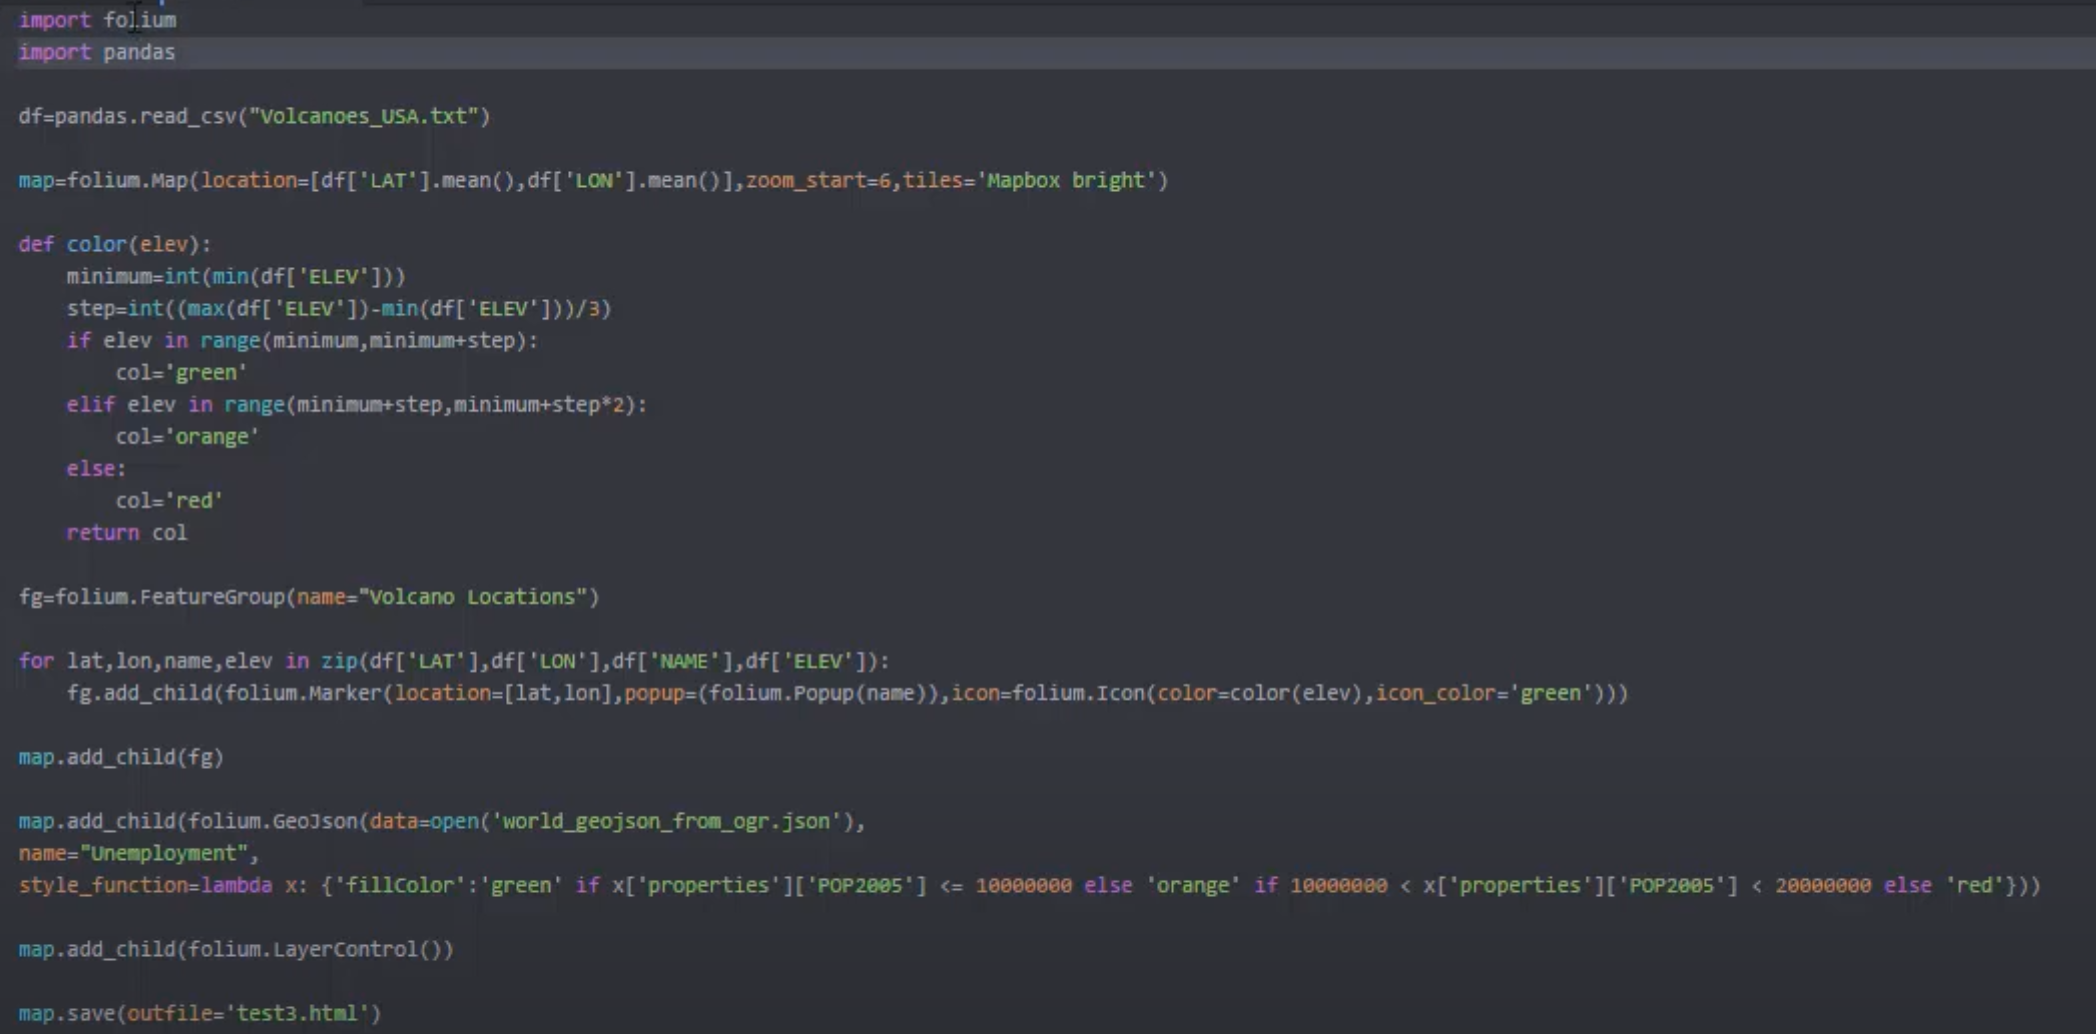

In [4]:
# https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/

 
COORDINATES = (55.967806, -3.30758)
traffic_data = pd.read_csv('dft_rawcount_region_id_3.csv',dtype={'latitude': float,'longitude':float,'all_motor_vehicles':float})
#dft_rawcount_region_id_3.csv

# for speed purposes
MAX_RECORDS = 200
  
# create empty map zoomed in on San Francisco
map = folium.Map(location=COORDINATES, zoom_start=8,control_scale = True)

Layer1 = folium.FeatureGroup(name = "CP Traffic Volume")
# add a marker for every record in the filtered data, use a clustered view
for each in traffic_data[0:MAX_RECORDS].iterrows():
    traffic_number = each[1]['all_motor_vehicles']
    if traffic_number < 20:
        color = '#C6DBF0'
    elif traffic_number < 500:
        color = '#77A9DB'
    elif traffic_number < 1000:
        color = '#4292C5'
    else:
        color = '#073268'
        
    folium.Marker(location = [each[1]['latitude'],each[1]['longitude']],
                  icon = plugins.BeautifyIcon(number = traffic_number,
                                             border_color = "blue",
                                             border_width =1,
                                             text_color ="white",
                                             inner_icon_style="margin-top:0px",
                                              background_color = color,
                                              spin = True,
                                              icon_shape = "rectangle"
                                            )).add_to(Layer1)


############################################################################a####################

Layer2 = folium.FeatureGroup (name = "Heat Map")

# plot heatmap
COORDINATES = (55.967806, -3.30758)
map = folium.Map(location=COORDINATES, zoom_start=8,control_scale = True)
# pointArrays = numpy.split(points, len(points))

Layer2.add_child(plugins.HeatMap(stationArr, radius =15,gradient = {Marker20 :'#C6DBF0',Marker500 :'#77A9DB',Marker1500:'#4292C5',1:'#073268'}))






######################################################################################################
map.add_child(Layer1)
map.add_child(Layer2)

folium.LayerControl().add_to(map)

map.save('happy.html')
display(map)